<a href="https://colab.research.google.com/github/lucianogarim/Analise_Exploratoria_de_Dados_Petrofisica/blob/main/T%C3%B3pico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados para Petrofísica**

Nesta segunda aula iremos abordar a criação de tracks e gráficos.

As seguintes bibliotecas serão utilizadas:

1.   Pandas
2.   Matplotlib
3.   Numpy

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# URL do conjunto de dados hospedado no GitHub
URL = "https://raw.githubusercontent.com/seg/2016-ml-contest/160430c84659785c7cfc74fd380ffa05c387b8cb/training_data.csv"
df = pd.read_csv(URL)

df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


Vamo fazer as verificações iniciais no conjunto de dados.

In [16]:
# Verificando os tipos de dados
df.dtypes

,0
Facies,int64
Formation,object
Well Name,object
Depth,float64
GR,float64
ILD_log10,float64
DeltaPHI,float64
PHIND,float64
PE,float64
NM_M,int64


In [17]:
# Verificando se os dados possuem valores nulos
df.isna().sum()

,0
Facies,0
Formation,0
Well Name,0
Depth,0
GR,0
ILD_log10,0
DeltaPHI,0
PHIND,0
PE,0
NM_M,0


# Geração de Gráficos com Biblioteca **Matplotlib**

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

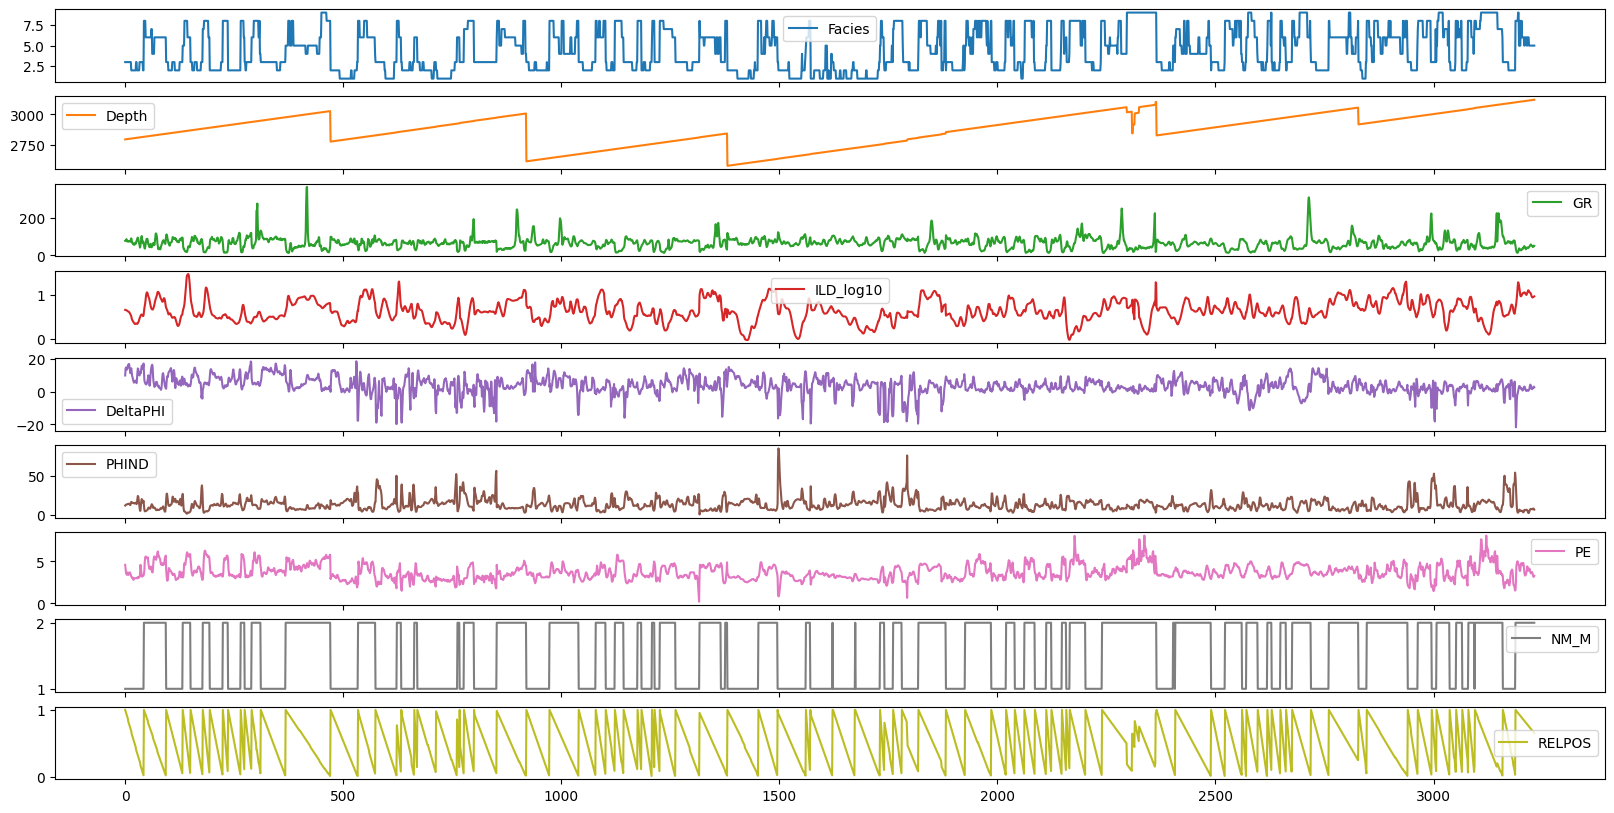

In [18]:
# Exemplo de plot geral, sem formatação
df.plot(subplots=True,figsize=(20,10))

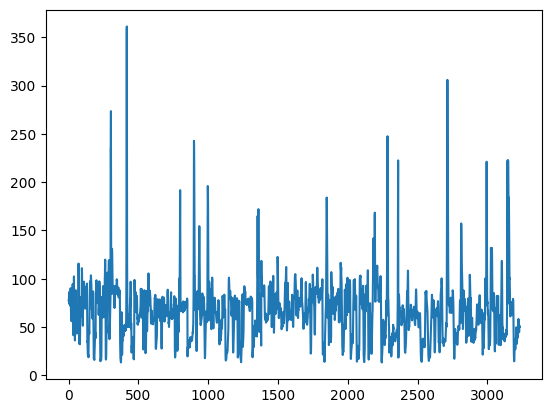

In [19]:
# Exemplo de plot de GR
plt.plot(df['GR'])

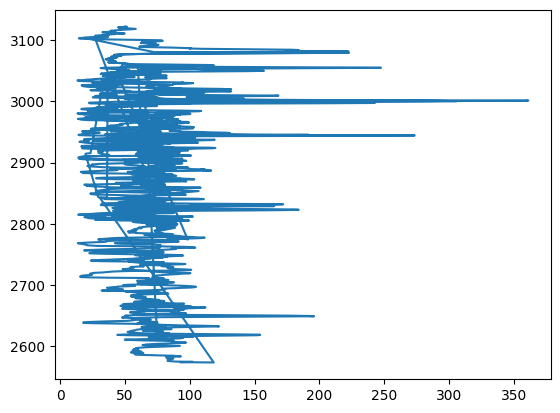

In [20]:
# Incluindo a profundidade
plt.plot(df['GR'],df['Depth'])

# Veja que o plot não parece certo. 1º A depth está "invertida", 2º existe uma sobreposição da curva

In [21]:
# Vamos filtrar o dado por poço. Vamos descobrir quais poços nós temos
df["Well Name"].unique()

array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

In [22]:
# Vamos escolher um poço
df_nolan = df[df["Well Name"] == "NOLAN"]
df_nolan.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
1882,2,A1 SH,NOLAN,2853.5,106.813,0.533,9.339,15.222,3.500,1,1.000
1883,3,A1 SH,NOLAN,2854.0,100.938,0.542,8.857,15.313,3.416,1,0.977
1884,3,A1 SH,NOLAN,2854.5,94.375,0.553,7.097,14.583,3.195,1,0.955
1885,3,A1 SH,NOLAN,2855.0,89.813,0.554,7.081,14.110,2.963,1,0.932
1886,3,A1 SH,NOLAN,2855.5,91.563,0.560,6.733,13.189,2.979,1,0.909


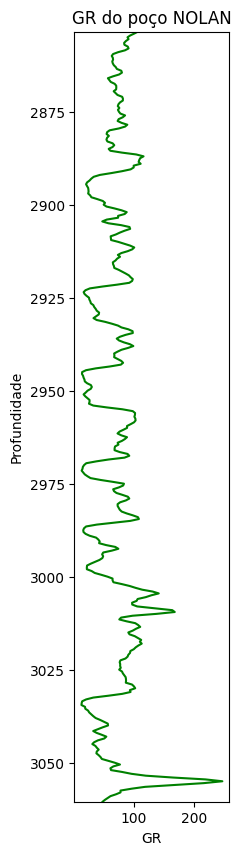

In [23]:
# Exemplo de plot um pouco mais elaborado
fig, ax = plt.subplots(figsize=(2,10))
ax.plot(df_nolan['GR'], df_nolan['Depth'], c = 'green')
ax.set_ylim(df_nolan['Depth'].max(), df_nolan['Depth'].min()) # Inverte o eixo y
ax.set_xlabel('GR')
ax.set_ylabel('Profundidade')
ax.set_title('GR do poço NOLAN')
plt.show()

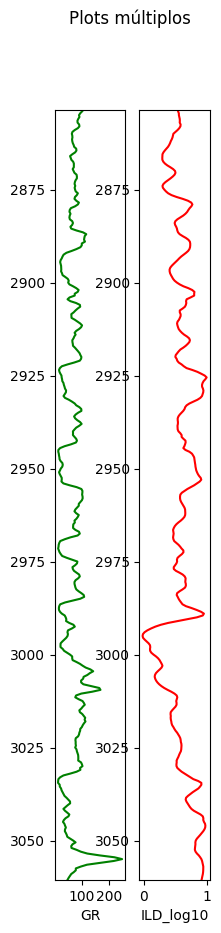

In [24]:
# Exemplo com múltiplos plots
fig, ax = plt.subplots(1,2,figsize=(2,10))

ax[0].plot(df_nolan['GR'], df_nolan['Depth'], c = 'green')
ax[0].set_ylim(df_nolan['Depth'].max(), df_nolan['Depth'].min()) # Inverte o eixo y
ax[0].set_xlabel('GR')

ax[1].plot(df_nolan['ILD_log10'], df_nolan['Depth'], c = 'red')
ax[1].set_ylim(df_nolan['Depth'].max(), df_nolan['Depth'].min()) # Inverte o eixo y
ax[1].set_xlabel('ILD_log10')

fig.suptitle('Plots múltiplos') # Set the title for the entire figure

plt.show()

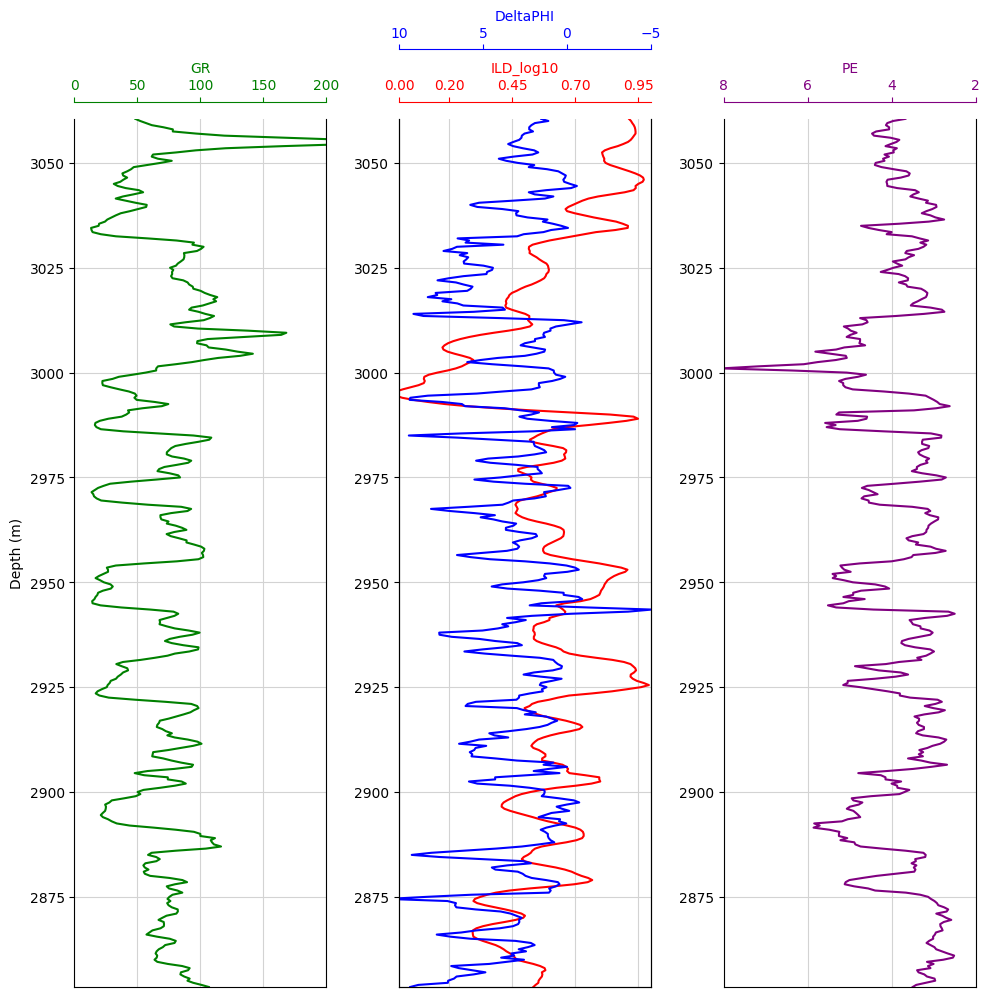

In [25]:
# Exemplo Completo
fig = plt.figure(figsize=(10,10))

# Configuração dos eixos
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny()

# Track do Gamma Ray
ax1.plot("GR", "Depth", data = df_nolan, color = "green")
ax1.set_xlabel("GR")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Track do ILD_log10
ax2.plot("ILD_log10", "Depth", data = df_nolan, color = "red")
ax2.set_xlabel("ILD_log10")
ax2.set_xlim(0, 1)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0, 0.2, 0.45, 0.7, 0.95])

# Track do PE
ax3.plot("PE", "Depth", data = df_nolan, color = "purple")
ax3.set_xlabel("PE")
ax3.set_xlim(8, 2)
ax3.xaxis.label.set_color("purple")
ax3.tick_params(axis='x', colors="purple")
ax3.spines["top"].set_edgecolor("purple")
ax3.set_xticks([8,6,4,2])

# Track do DeltaPHI
ax4.plot("DeltaPHI", "Depth", data = df_nolan, color = "blue")
ax4.set_xlabel('DeltaPHI')
ax4.xaxis.label.set_color("blue")
ax4.set_xlim(10, -5)
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([10,5,0,-5])

# Configurações em comum entre os tracks
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(df_nolan["Depth"].min(), df_nolan["Depth"].max())
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))

plt.tight_layout()

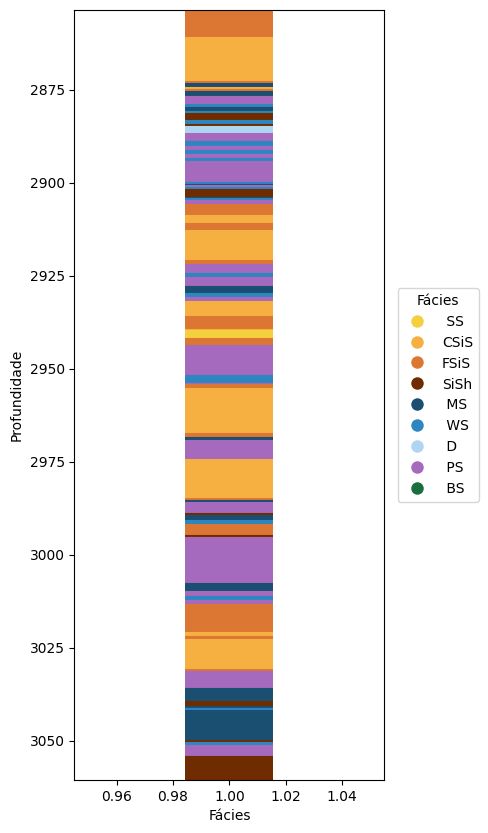

In [26]:
# Configurações reutilizáveis
###########################################################
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

fig, ax = plt.subplots(figsize=(4, 10))

# Mapear os rótulos de classe para as cores correspondentes
cores = df_nolan['Facies'].map(lambda x: facies_colors[x-1])

# Adicionar legenda manualmente
Legenda_facies = [' SS ', 'CSiS', 'FSiS', 'SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']
############################################################

# Scatter plot com as cores correspondentes às facies
ax.scatter(np.ones(len(df_nolan)), df_nolan["Depth"], c=cores, s=4000, marker='_')
ax.set_xlabel('Fácies')
ax.set_ylabel('Profundidade')
ax.set_ylim(df_nolan["Depth"].max(), df_nolan["Depth"].min())  # Define os limites do eixo y - invertendo a profundidade

# Ajuste de legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in facies_colors]
ax.legend(
    handles, Legenda_facies,
    loc='center left',            # ancora à esquerda do bbox_to_anchor
    bbox_to_anchor=(1.02, 0.5),   # desloca para fora (1.02 = um pouco à direita)
    title="Fácies"
)

# Exibir o gráfico
plt.show()

Plotando com as Fácies

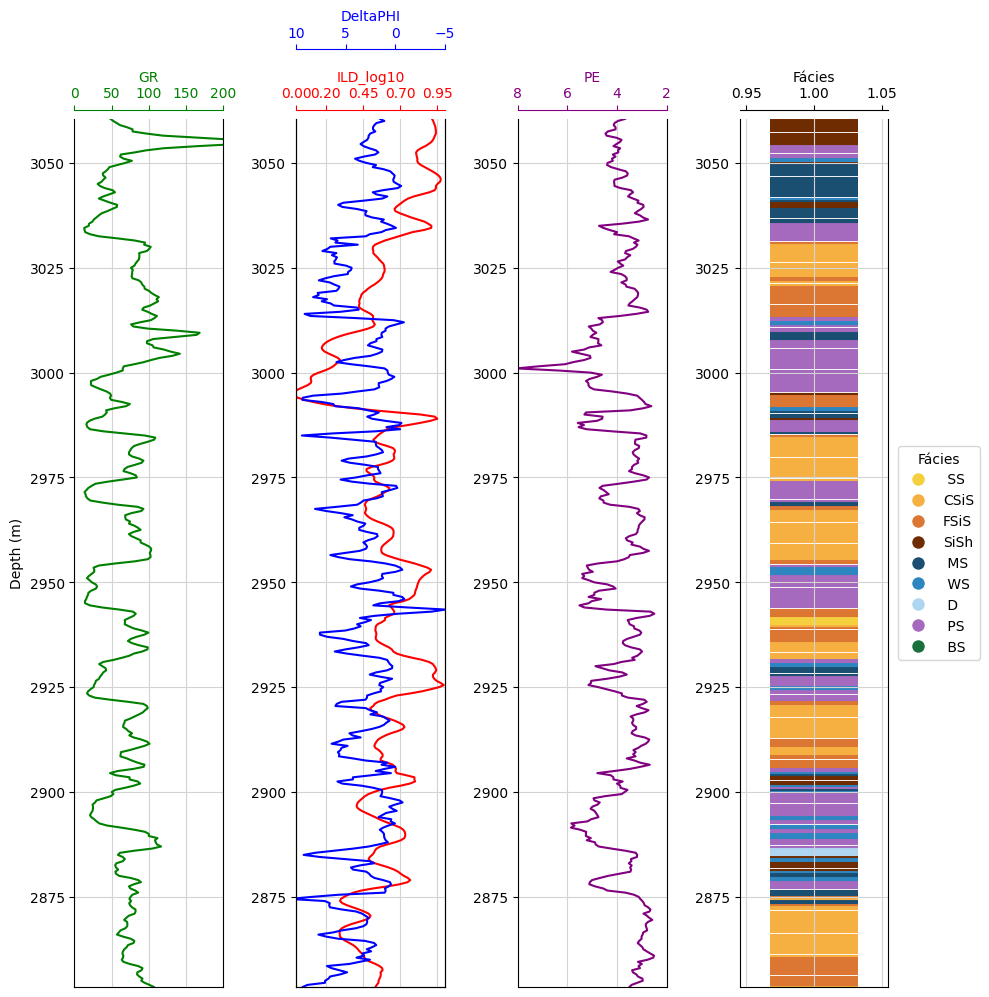

In [27]:
# Exemplo Completo
fig = plt.figure(figsize=(10,10))

ax.set_ylim(df_nolan["Depth"].min(), df_nolan["Depth"].max())

# Configuração dos eixos
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1)
ax4 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
ax5 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1)

# Track do Gamma Ray
ax1.plot("GR", "Depth", data = df_nolan, color = "green")
ax1.set_xlabel("GR")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Track do ILD_log10
ax2.plot("ILD_log10", "Depth", data = df_nolan, color = "red")
ax2.set_xlabel("ILD_log10")
ax2.set_xlim(0, 1)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0, 0.2, 0.45, 0.7, 0.95])

# Track do PE
ax3.plot("PE", "Depth", data = df_nolan, color = "purple")
ax3.set_xlabel("PE")
ax3.set_xlim(8, 2)
ax3.xaxis.label.set_color("purple")
ax3.tick_params(axis='x', colors="purple")
ax3.spines["top"].set_edgecolor("purple")
ax3.set_xticks([8,6,4,2])

# Track do DeltaPHI
ax4.plot("DeltaPHI", "Depth", data = df_nolan, color = "blue")
ax4.set_xlabel('DeltaPHI')
ax4.xaxis.label.set_color("blue")
ax4.set_xlim(10, -5)
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([10,5,0,-5])

# Track das Fácies
ax5.scatter(np.ones(len(df_nolan)), df_nolan["Depth"], c=cores, s=4000, marker='_')
ax5.set_xlabel('Fácies')
ax5.set_ylim(df_nolan["Depth"].max(), df_nolan["Depth"].min())

# Ajuste de legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in facies_colors]
ax5.legend(
    handles, Legenda_facies,
    loc='center left',            # ancora à esquerda do bbox_to_anchor
    bbox_to_anchor=(1.02, 0.5),   # desloca para fora (1.02 = um pouco à direita)
    title="Fácies"
)

# Configurações em comum entre os tracks
for ax in [ax1, ax2, ax3, ax5]:
    ax.set_ylim(df_nolan["Depth"].min(), df_nolan["Depth"].max())
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.01))

plt.tight_layout()

Plotando com as Fácies e as Zonas

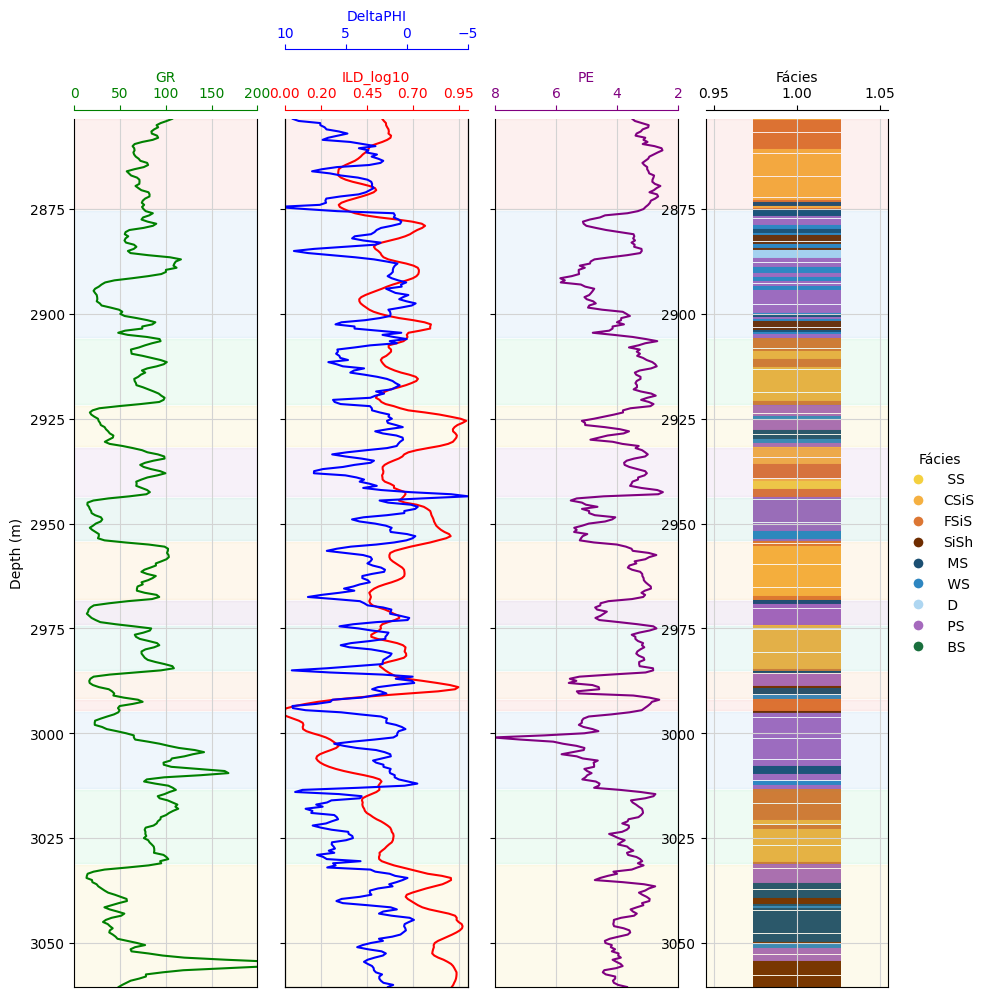

In [28]:
# Definindo cores para zonas
zone_colours = [
    "#E74C3C", "#3498DB", "#2ECC71", "#F1C40F", "#9B59B6",
    "#16A085", "#F39C12", "#7D3C98", "#1ABC9C", "#E67E22"
] # para as Formations (vai ciclar se tiver mais)

# --------- FUNÇÃO: intervalos (Top/Base) por Formation ----------
def build_intervals(df, depth_col='Depth', zone_col='Formation'):
    """Agrupa amostras contíguas com a mesma Formation e devolve Top/Base de cada zona."""
    tmp = df[[depth_col, zone_col]].dropna().sort_values(depth_col)
    # identifica mudanças de formação
    blocks = (tmp[zone_col] != tmp[zone_col].shift()).cumsum()
    ivals = tmp.groupby(blocks).agg(
        Top=(depth_col, 'min'),
        Base=(depth_col, 'max'),
        Formation=(zone_col, 'first')
    ).reset_index(drop=True)
    return ivals

intervals = build_intervals(df_nolan)

# --------- FIGURA / EIXOS ----------
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,4), (0,0))
ax2 = plt.subplot2grid((1,4), (0,1))
ax3 = plt.subplot2grid((1,4), (0,2))
ax4 = ax2.twiny()
ax5 = plt.subplot2grid((1,4), (0,3))

# Limites de profundidade (um lugar só)
zmin, zmax = df_nolan["Depth"].min(), df_nolan["Depth"].max()

# --------- TRACKS ----------
# GR
ax1.plot(df_nolan["GR"], df_nolan["Depth"], color="green")
ax1.set(xlabel="GR", xlim=(0,200), ylabel="Depth (m)")
ax1.xaxis.label.set_color("green")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.set_xticks([0,50,100,150,200])

# ILD_log10
ax2.plot(df_nolan["ILD_log10"], df_nolan["Depth"], color="red")
ax2.set(xlabel="ILD_log10", xlim=(0,1))
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0,0.2,0.45,0.7,0.95])

# PE
ax3.plot(df_nolan["PE"], df_nolan["Depth"], color="purple")
ax3.set(xlabel="PE", xlim=(8,2))
ax3.xaxis.label.set_color("purple")
ax3.tick_params(axis='x', colors="purple")
ax3.spines["top"].set_edgecolor("purple")
ax3.set_xticks([8,6,4,2])

# DeltaPHI (eixo gêmeo em x)
ax4.plot(df_nolan["DeltaPHI"], df_nolan["Depth"], color="blue")
ax4.set(xlabel="DeltaPHI", xlim=(10,-5))
ax4.xaxis.label.set_color("blue")
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([10,5,0,-5])

# FÁCIES
ax5.scatter(np.ones(len(df_nolan)), df_nolan["Depth"], c=cores, s=4000, marker='_')
ax5.set_xlabel('Fácies')

# --------- ESTILO COMUM / Y INVERTIDO ----------
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_ylim(zmin, zmax)
    ax.invert_yaxis()
for ax in [ax1, ax2, ax3, ax5]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.01))

# Esconde y-ticks nos tracks do meio
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible=False)

# --------- SOMBREAMENTO POR FORMATION (Top/Base) ----------
# Aplica a TODOS os eixos desejados (menos no ax4 se preferir)
shade_axes = [ax1, ax2, ax3, ax5]
for i, row in intervals.iterrows():
    color = zone_colours[i % len(zone_colours)]
    for ax in shade_axes:
        ax.axhspan(row['Top'], row['Base'], color=color, alpha=0.08)

# --------- LEGENDA DE FÁCIES (fora do eixo) ----------
handles = [plt.Line2D([0],[0], marker='o', color='w', markerfacecolor=c, markersize=8)
           for c in facies_colors]
ax5.legend(handles, Legenda_facies, title="Fácies",
           loc='center left', bbox_to_anchor=(1.02,0.5), frameon=False)

plt.tight_layout()
fig.subplots_adjust(wspace=0.15)
plt.show()


Plots de Dispersão

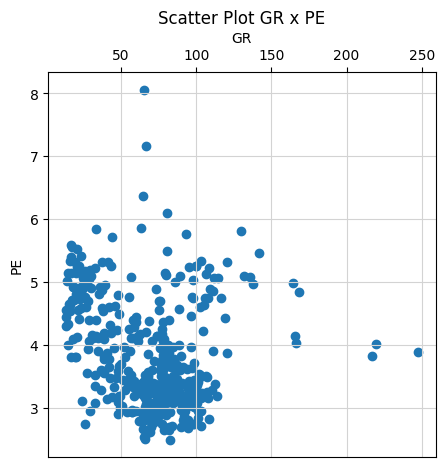

In [29]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(df_nolan['GR'], df_nolan['PE'])
ax.set_xlabel('GR')
ax.set_ylabel('PE')
ax.set_title('Scatter Plot GR x PE')

ax.grid(which='major', color='lightgrey', linestyle='-')
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

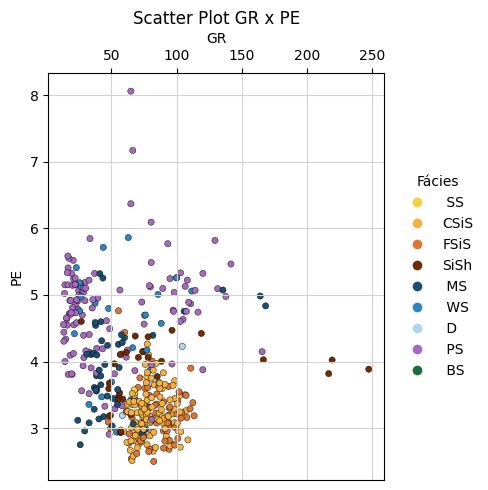

In [30]:
# Plot completo discriminado por fácies
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_nolan['GR'], df_nolan['PE'], c=cores, s=20, edgecolor='k', linewidth=0.3)

ax.set_xlabel('GR')
ax.set_ylabel('PE')
ax.set_title('Scatter Plot GR x PE')
ax.grid(which='major', color='lightgrey', linestyle='-')
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# Legenda
handles = [plt.Line2D([0],[0], marker='o', color='w',
                      markerfacecolor=c, markersize=8)
           for c in facies_colors]
ax.legend(handles, Legenda_facies, title="Fácies",
          loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.tight_layout()
plt.show()


<Axes: xlabel='DeltaPHI', ylabel='ILD_log10'>

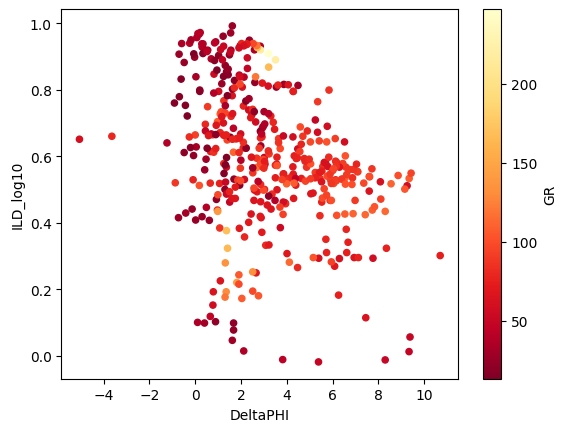

In [31]:
df_nolan.plot(kind="scatter", x="DeltaPHI", y="ILD_log10", c="GR",
          colormap="YlOrRd_r")

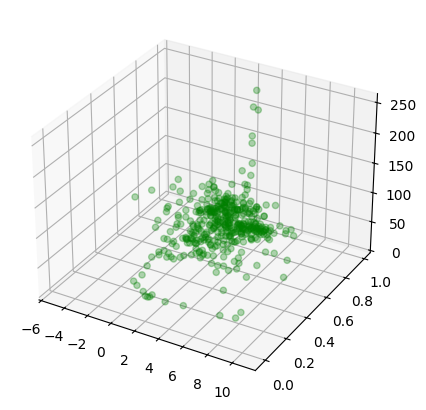

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df_nolan["DeltaPHI"], df_nolan["ILD_log10"], df_nolan["GR"], alpha= 0.3, c="g")

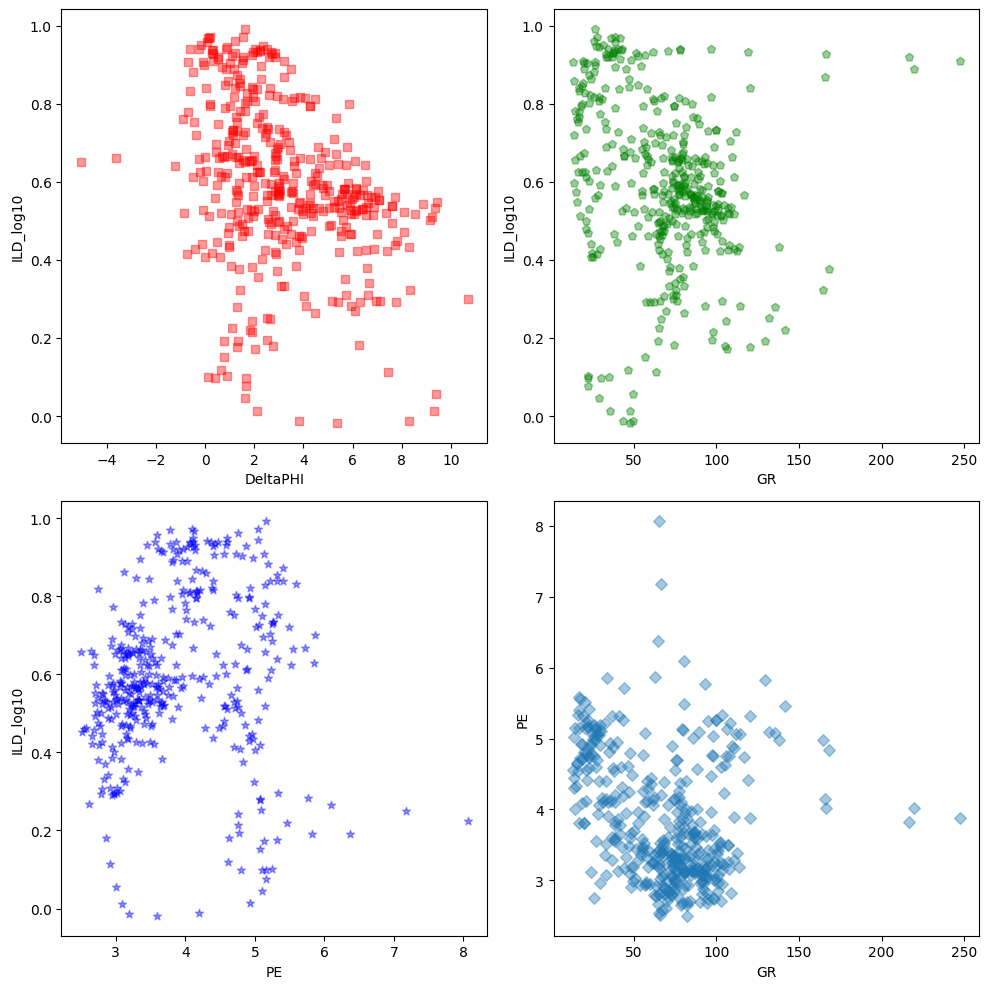

In [33]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0))
ax4 = plt.subplot2grid((2,2), (1,1))

ax1.scatter(x= "DeltaPHI", y= "ILD_log10", data= df_nolan, marker="s", alpha= 0.4, c='r')
ax1.set_ylabel("ILD_log10")
ax1.set_xlabel("DeltaPHI")

ax2.scatter(x= "GR", y= "ILD_log10", data= df_nolan, marker="p", alpha= 0.4, c='g')
ax2.set_ylabel("ILD_log10")
ax2.set_xlabel("GR")

ax3.scatter(x= "PE", y= "ILD_log10", data= df_nolan, marker="*", alpha= 0.4, c='b')
ax3.set_ylabel("ILD_log10")
ax3.set_xlabel("PE")

ax4.scatter(x= "GR", y= "PE", data= df_nolan, marker="D", alpha= 0.4)
ax4.set_ylabel("PE")
ax4.set_xlabel("GR")

plt.tight_layout()

Gráfico de Pizza

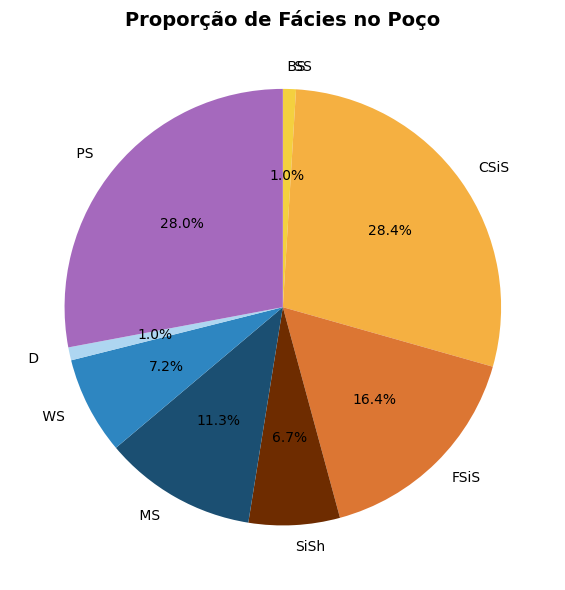

In [34]:
# Contagem real de fácies presentes no dataset
facies_counts = df_nolan['Facies'].value_counts().sort_index()

# Garante que todas as 9 fácies existam (as ausentes terão valor 0)
facies_counts = facies_counts.reindex(range(1,10), fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(
    facies_counts,
    labels=Legenda_facies,
    colors=facies_colors,
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # esconde fatias de 0%
    startangle=90,
    counterclock=False
)

ax.set_title('Proporção de Fácies no Poço', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()